# Strategic Thinking for Data Analysis - CA3

### Data Source

The source of the datasets is Kaggle, which provides public datasets for analysis. Two datasets generated from photovoltaic energy generation and temperature sensor data from two solar plants in India will be used. These datasets contain 34 days of generation data from the year 2020.

In order to facilitate and simplify the analysis, data from only one of the Photovoltaic Plants will be used.

**Dataset names:** Plant_1_Generation_Data and Plant_1_Weather_Data.


### Variable Identification
#### Generation data
- DATE_TIME - Date and time for each observation. Observations recorded at 15 minute intervals.
- PLANT_ID - Plant ID number.
- INVERTER - Inverter id.
- DC_POWER - Amount of DC power generated by the Inverter in this 15 minute interval (kW).
- AC_POWER - Amount of AC power generated by the Inverter in this 15 minute interval (kW).
- DAILY_YIELD - Daily yield is a cumulative sum of power generated on that day, till that point in time.
- TOTAL_YIELD - This is the total yield for the inverter till that point in time.

#### Tempearture and Solar Irradiation data
- DATE_TIME - Date and time for each observation. Observations recorded at 15 minute intervals.
- Plant ID - this will be common for the entire file.
- SENSOR - Stands for the sensor panel id.
- AMBIENT_TEMPERATURE - This is the ambient temperature at the plant.
- MODULE_TEMPERATURE - There is a module (solar panel) attached to the sensor panel. This is the temperature reading for that module.
- IRRADIATION - Amount of irradiation for the 15 minute interval.

In [43]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

import warnings
warnings.filterwarnings("ignore")

In [2]:
# Loading the Generation Data set 1
df_gen = pd.read_csv('Data\Plant_1_Generation_Data.csv')
df_gen.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68778 entries, 0 to 68777
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   DATE_TIME    68778 non-null  object 
 1   PLANT_ID     68778 non-null  int64  
 2   SOURCE_KEY   68778 non-null  object 
 3   DC_POWER     68778 non-null  float64
 4   AC_POWER     68778 non-null  float64
 5   DAILY_YIELD  68778 non-null  float64
 6   TOTAL_YIELD  68778 non-null  float64
dtypes: float64(4), int64(1), object(2)
memory usage: 3.7+ MB


In [3]:
# Loading the Weather Data set 1
df_wth = pd.read_csv('Data\Plant_1_Weather_Sensor_Data.csv')
df_wth.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3182 entries, 0 to 3181
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   DATE_TIME            3182 non-null   object 
 1   PLANT_ID             3182 non-null   int64  
 2   SOURCE_KEY           3182 non-null   object 
 3   AMBIENT_TEMPERATURE  3182 non-null   float64
 4   MODULE_TEMPERATURE   3182 non-null   float64
 5   IRRADIATION          3182 non-null   float64
dtypes: float64(3), int64(1), object(2)
memory usage: 149.3+ KB


### Converting the 'DATE_TIME' column to datetime type

In [4]:
df_gen['DATE_TIME']= pd.to_datetime(df_gen['DATE_TIME'],format='%d-%m-%Y %H:%M')
df_gen.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68778 entries, 0 to 68777
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   DATE_TIME    68778 non-null  datetime64[ns]
 1   PLANT_ID     68778 non-null  int64         
 2   SOURCE_KEY   68778 non-null  object        
 3   DC_POWER     68778 non-null  float64       
 4   AC_POWER     68778 non-null  float64       
 5   DAILY_YIELD  68778 non-null  float64       
 6   TOTAL_YIELD  68778 non-null  float64       
dtypes: datetime64[ns](1), float64(4), int64(1), object(1)
memory usage: 3.7+ MB


In [5]:
df_wth['DATE_TIME']= pd.to_datetime(df_wth['DATE_TIME'],format='%Y-%m-%d %H:%M:%S')
df_wth.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3182 entries, 0 to 3181
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   DATE_TIME            3182 non-null   datetime64[ns]
 1   PLANT_ID             3182 non-null   int64         
 2   SOURCE_KEY           3182 non-null   object        
 3   AMBIENT_TEMPERATURE  3182 non-null   float64       
 4   MODULE_TEMPERATURE   3182 non-null   float64       
 5   IRRADIATION          3182 non-null   float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(1)
memory usage: 149.3+ KB


# Exploratory Data Analysis

Data Understanding, Cleaning, Preprocessing, and Various Analyses

##  Generation Data Sets Info

In [6]:
df_gen.shape

(68778, 7)

In [7]:
df_wth.shape

(3182, 6)

In [8]:
df_gen.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68778 entries, 0 to 68777
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   DATE_TIME    68778 non-null  datetime64[ns]
 1   PLANT_ID     68778 non-null  int64         
 2   SOURCE_KEY   68778 non-null  object        
 3   DC_POWER     68778 non-null  float64       
 4   AC_POWER     68778 non-null  float64       
 5   DAILY_YIELD  68778 non-null  float64       
 6   TOTAL_YIELD  68778 non-null  float64       
dtypes: datetime64[ns](1), float64(4), int64(1), object(1)
memory usage: 3.7+ MB


In [9]:
df_wth.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3182 entries, 0 to 3181
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   DATE_TIME            3182 non-null   datetime64[ns]
 1   PLANT_ID             3182 non-null   int64         
 2   SOURCE_KEY           3182 non-null   object        
 3   AMBIENT_TEMPERATURE  3182 non-null   float64       
 4   MODULE_TEMPERATURE   3182 non-null   float64       
 5   IRRADIATION          3182 non-null   float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(1)
memory usage: 149.3+ KB


## Checking for Null values

In [10]:
df_gen.isnull().sum()

DATE_TIME      0
PLANT_ID       0
SOURCE_KEY     0
DC_POWER       0
AC_POWER       0
DAILY_YIELD    0
TOTAL_YIELD    0
dtype: int64

In [11]:
df_wth.isnull().sum()

DATE_TIME              0
PLANT_ID               0
SOURCE_KEY             0
AMBIENT_TEMPERATURE    0
MODULE_TEMPERATURE     0
IRRADIATION            0
dtype: int64

## Variable adjustment

### Changing the variable name

In [12]:
df_gen = df_gen.rename(columns={'SOURCE_KEY':'INVERTER'})
df_wth = df_wth.rename(columns={'SOURCE_KEY':'SENSOR'})

### Changing the variable type

#### Function imprimir_valores_unicos()
A function that prints the unique values of each variable.

In [13]:
def imprimir_valores_unicos(data_f):
    for coluna in data_f.columns:
        valores_unicos = data_f[coluna].unique()
        print(f"  {coluna} = {valores_unicos}")

imprimir_valores_unicos(df_gen)
imprimir_valores_unicos(df_wth)

  DATE_TIME = <DatetimeArray>
['2020-05-15 00:00:00', '2020-05-15 00:15:00', '2020-05-15 00:30:00',
 '2020-05-15 00:45:00', '2020-05-15 01:00:00', '2020-05-15 01:15:00',
 '2020-05-15 01:30:00', '2020-05-15 01:45:00', '2020-05-15 02:00:00',
 '2020-05-15 02:15:00',
 ...
 '2020-06-17 21:30:00', '2020-06-17 21:45:00', '2020-06-17 22:00:00',
 '2020-06-17 22:15:00', '2020-06-17 22:30:00', '2020-06-17 22:45:00',
 '2020-06-17 23:00:00', '2020-06-17 23:15:00', '2020-06-17 23:30:00',
 '2020-06-17 23:45:00']
Length: 3158, dtype: datetime64[ns]
  PLANT_ID = [4135001]
  INVERTER = ['1BY6WEcLGh8j5v7' '1IF53ai7Xc0U56Y' '3PZuoBAID5Wc2HD' '7JYdWkrLSPkdwr4'
 'McdE0feGgRqW7Ca' 'VHMLBKoKgIrUVDU' 'WRmjgnKYAwPKWDb' 'ZnxXDlPa8U1GXgE'
 'ZoEaEvLYb1n2sOq' 'adLQvlD726eNBSB' 'bvBOhCH3iADSZry' 'iCRJl6heRkivqQ3'
 'ih0vzX44oOqAx2f' 'pkci93gMrogZuBj' 'rGa61gmuvPhdLxV' 'sjndEbLyjtCKgGv'
 'uHbuxQJl8lW7ozc' 'wCURE6d3bPkepu2' 'z9Y9gH1T5YWrNuG' 'zBIq5rxdHJRwDNY'
 'zVJPv84UY57bAof' 'YxYtjZvoooNbGkE']
  DC_POWER = [  0.    

In [14]:
df_gen

,DATE_TIME,PLANT_ID,INVERTER,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD
0,2020-05-15 00:00:00,4135001,1BY6WEcLGh8j5v7,0.0,0.0,0.000,6259559.0
1,2020-05-15 00:00:00,4135001,1IF53ai7Xc0U56Y,0.0,0.0,0.000,6183645.0
2,2020-05-15 00:00:00,4135001,3PZuoBAID5Wc2HD,0.0,0.0,0.000,6987759.0
3,2020-05-15 00:00:00,4135001,7JYdWkrLSPkdwr4,0.0,0.0,0.000,7602960.0
4,2020-05-15 00:00:00,4135001,McdE0feGgRqW7Ca,0.0,0.0,0.000,7158964.0
...,...,...,...,...,...,...,...
68773,2020-06-17 23:45:00,4135001,uHbuxQJl8lW7ozc,0.0,0.0,5967.000,7287002.0
68774,2020-06-17 23:45:00,4135001,wCURE6d3bPkepu2,0.0,0.0,5147.625,7028601.0
68775,2020-06-17 23:45:00,4135001,z9Y9gH1T5YWrNuG,0.0,0.0,5819.000,7251204.0
68776,2020-06-17 23:45:00,4135001,zBIq5rxdHJRwDNY,0.0,0.0,5817.000,6583369.0


In [15]:
df_wth

,DATE_TIME,PLANT_ID,SENSOR,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION
0,2020-05-15 00:00:00,4135001,HmiyD2TTLFNqkNe,25.184316,22.857507,0.0
1,2020-05-15 00:15:00,4135001,HmiyD2TTLFNqkNe,25.084589,22.761668,0.0
2,2020-05-15 00:30:00,4135001,HmiyD2TTLFNqkNe,24.935753,22.592306,0.0
3,2020-05-15 00:45:00,4135001,HmiyD2TTLFNqkNe,24.846130,22.360852,0.0
4,2020-05-15 01:00:00,4135001,HmiyD2TTLFNqkNe,24.621525,22.165423,0.0
...,...,...,...,...,...,...
3177,2020-06-17 22:45:00,4135001,HmiyD2TTLFNqkNe,22.150570,21.480377,0.0
3178,2020-06-17 23:00:00,4135001,HmiyD2TTLFNqkNe,22.129816,21.389024,0.0
3179,2020-06-17 23:15:00,4135001,HmiyD2TTLFNqkNe,22.008275,20.709211,0.0
3180,2020-06-17 23:30:00,4135001,HmiyD2TTLFNqkNe,21.969495,20.734963,0.0


### Droping variables uniques

In [16]:
df_gen.drop(columns=['PLANT_ID'], inplace=True)
df_wth.drop(columns=['PLANT_ID'], inplace=True)
df_wth.drop(columns=['SENSOR'], inplace=True)

## Descriptive Statistics
Finding Mean, Median, Min and Max Values

In [17]:
df_gen.describe()

,DATE_TIME,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD
count,68778,68778.000000,68778.000000,68778.000000,6.877800e+04
mean,2020-06-01 08:02:49.458256896,3147.426211,307.802752,3295.968737,6.978712e+06
min,2020-05-15 00:00:00,0.000000,0.000000,0.000000,6.183645e+06
25%,2020-05-24 00:45:00,0.000000,0.000000,0.000000,6.512003e+06
50%,2020-06-01 14:30:00,429.000000,41.493750,2658.714286,7.146685e+06
75%,2020-06-09 20:00:00,6366.964286,623.618750,6274.000000,7.268706e+06
max,2020-06-17 23:45:00,14471.125000,1410.950000,9163.000000,7.846821e+06
std,NaN,4036.457169,394.396439,3145.178309,4.162720e+05


In [18]:
df_gen.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68778 entries, 0 to 68777
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   DATE_TIME    68778 non-null  datetime64[ns]
 1   INVERTER     68778 non-null  object        
 2   DC_POWER     68778 non-null  float64       
 3   AC_POWER     68778 non-null  float64       
 4   DAILY_YIELD  68778 non-null  float64       
 5   TOTAL_YIELD  68778 non-null  float64       
dtypes: datetime64[ns](1), float64(4), object(1)
memory usage: 3.1+ MB


In [19]:
df_wth.describe()

,DATE_TIME,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION
count,3182,3182.000000,3182.000000,3182.000000
mean,2020-06-01 05:52:22.080452608,25.531606,31.091015,0.228313
min,2020-05-15 00:00:00,20.398505,18.140415,0.000000
25%,2020-05-23 22:48:45,22.705182,21.090553,0.000000
50%,2020-06-01 09:52:30,24.613814,24.618060,0.024653
75%,2020-06-09 16:56:15,27.920532,41.307840,0.449588
max,2020-06-17 23:45:00,35.252486,65.545714,1.221652
std,NaN,3.354856,12.261222,0.300836


In [20]:
df_wth.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3182 entries, 0 to 3181
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   DATE_TIME            3182 non-null   datetime64[ns]
 1   AMBIENT_TEMPERATURE  3182 non-null   float64       
 2   MODULE_TEMPERATURE   3182 non-null   float64       
 3   IRRADIATION          3182 non-null   float64       
dtypes: datetime64[ns](1), float64(3)
memory usage: 99.6 KB


## Aggregation into Time Intervals

Preparation and organization for generation data analysis, aggregating them into larger time intervals.
Conversion of the time column to datetime formats and separating the date and time into distinct columns to facilitate analysis.

### Generation Dataframe

In [21]:
plant1_data=df_gen

# Group the data by the column 'DATE_TIME' and aggregate
# outhers columns by summing their values
plant1_data = plant1_data.groupby('DATE_TIME')[['DC_POWER',
                                                'AC_POWER', 
                                                'DAILY_YIELD',
                                                'TOTAL_YIELD']].agg('sum')

# Reset the index to make 'DATE_TIME' a regular column again
plant1_data = plant1_data.reset_index()

# Convert the 'DATE_TIME' column to datetime format,
# coercing errors to NaT (Not a Time) for any invalid values
plant1_data['DATE_TIME'] = pd.to_datetime(plant1_data['DATE_TIME'], errors='coerce')

# Storing DATE_TIME' in a new column 'time'
plant1_data['time'] = plant1_data['DATE_TIME'].dt.time

# Convert the 'DATE_TIME' column to datetime format and store in a new column 'date'
plant1_data['date'] = pd.to_datetime(plant1_data['DATE_TIME'].dt.date)

### Temperature Dataframe

In [22]:
plant1_sensor = df_wth

# Convert the 'DATE_TIME' column to datetime format,
# coercing errors to NaT (Not a Time) for any invalid values
plant1_sensor['DATE_TIME'] = pd.to_datetime(plant1_sensor['DATE_TIME'], errors='coerce')

# Storing DATE_TIME' in a new column 'time
plant1_sensor['time'] = pd.to_datetime(plant1_sensor['DATE_TIME']).dt.time

# Convert the 'DATE_TIME' column to datetime format and store in a new column 'date'
plant1_sensor['date'] = pd.to_datetime(pd.to_datetime(plant1_sensor['DATE_TIME']).dt.date)

### Merging Dataframes

Merging the plant1_sensor and plant1_data DataFrames using the 'DATE_TIME' column as the key. This results in a new DataFrame called power_sensor that contains all columns from both DataFrames, but combined based on the timestamp. Removing redundant columns from the power_sensor DataFrame, which were created as a result of merging the DataFrames. These columns are removed because they are duplicates.

In [23]:
# Merge the DataFrames plant1_sensor and plant1_data based on the 'DATE_TIME' column
power_sensor = plant1_sensor.merge(plant1_data, left_on='DATE_TIME', right_on='DATE_TIME')

# Delete unnecessary columns from the merged DataFrame
del power_sensor['date_x']
del power_sensor['date_y']
del power_sensor['time_x']
del power_sensor['time_y']

## Heatmap
Displaying the correlation between power and temperature variables.

In [25]:
c= power_sensor.corr()
c

,DATE_TIME,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD
DATE_TIME,1.000000,-0.215680,-0.093266,-0.032842,-0.025361,-0.025288,0.028455,0.235218
AMBIENT_TEMPERATURE,-0.215680,1.000000,0.853162,0.721839,0.725679,0.725879,0.498010,-0.039269
MODULE_TEMPERATURE,-0.093266,0.853162,1.000000,0.961422,0.960939,0.961011,0.212765,0.069338
IRRADIATION,-0.032842,0.721839,0.961422,1.000000,0.995957,0.995864,0.089470,0.102223
DC_POWER,-0.025361,0.725679,0.960939,0.995957,1.000000,0.999997,0.092450,0.106301
AC_POWER,-0.025288,0.725879,0.961011,0.995864,0.999997,1.000000,0.092403,0.106401
DAILY_YIELD,0.028455,0.498010,0.212765,0.089470,0.092450,0.092403,1.000000,-0.000510
TOTAL_YIELD,0.235218,-0.039269,0.069338,0.102223,0.106301,0.106401,-0.000510,1.000000


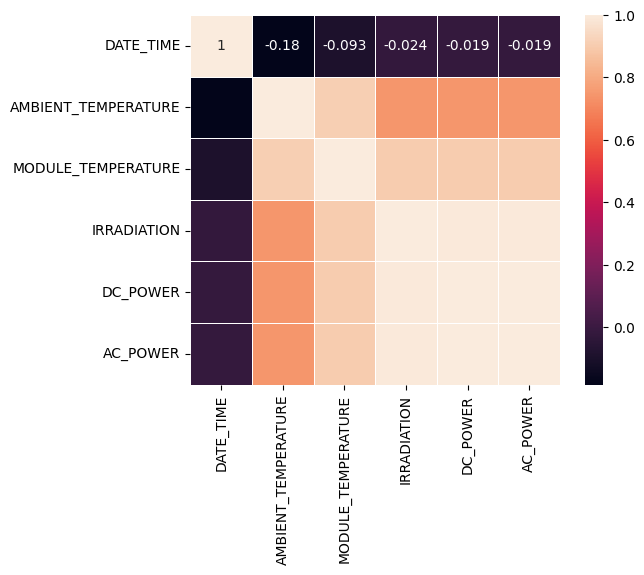

In [28]:
# Calculate the Spearman correlation matrix for the columns of power_sensor, excluding 'DAILY_YIELD' and 'TOTAL_YIELD'
corr = power_sensor.drop(columns=['DAILY_YIELD', 'TOTAL_YIELD']).corr(method='spearman')

# Create a new figure with a specified DPI
plt.figure(dpi=100)

# Create a heatmap plot of the correlation matrix using seaborn and display the plot
sns.heatmap(corr, robust=True, annot=True, linewidths=.5, square=True)
plt.show()

## Matrix of Scatter Plots

Exploring relationships and correlations between variables in the power and sensor dataset, to quickly understand how variables interact with each other.

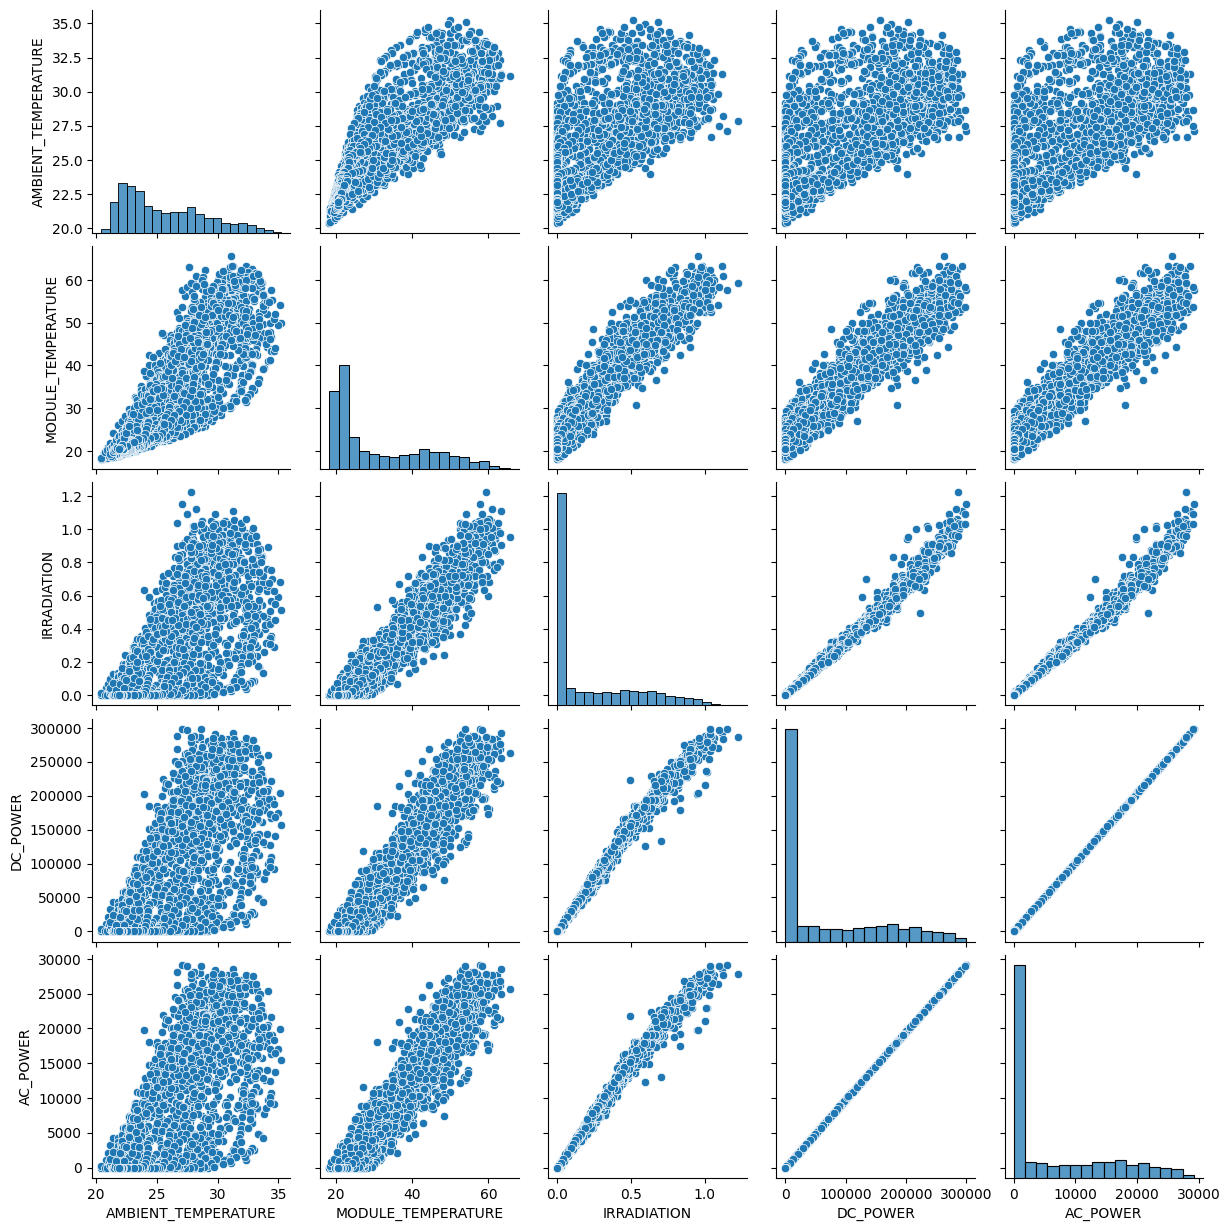

In [29]:
sns.pairplot(power_sensor.drop(columns=['DAILY_YIELD', 'TOTAL_YIELD']))
plt.show()

## Scatter Plot and Mean DC Power

Plot the data points from the 'DC_POWER' column against the 'time' column in the format of a scatter plot and plot the mean of DC power on a line graph.

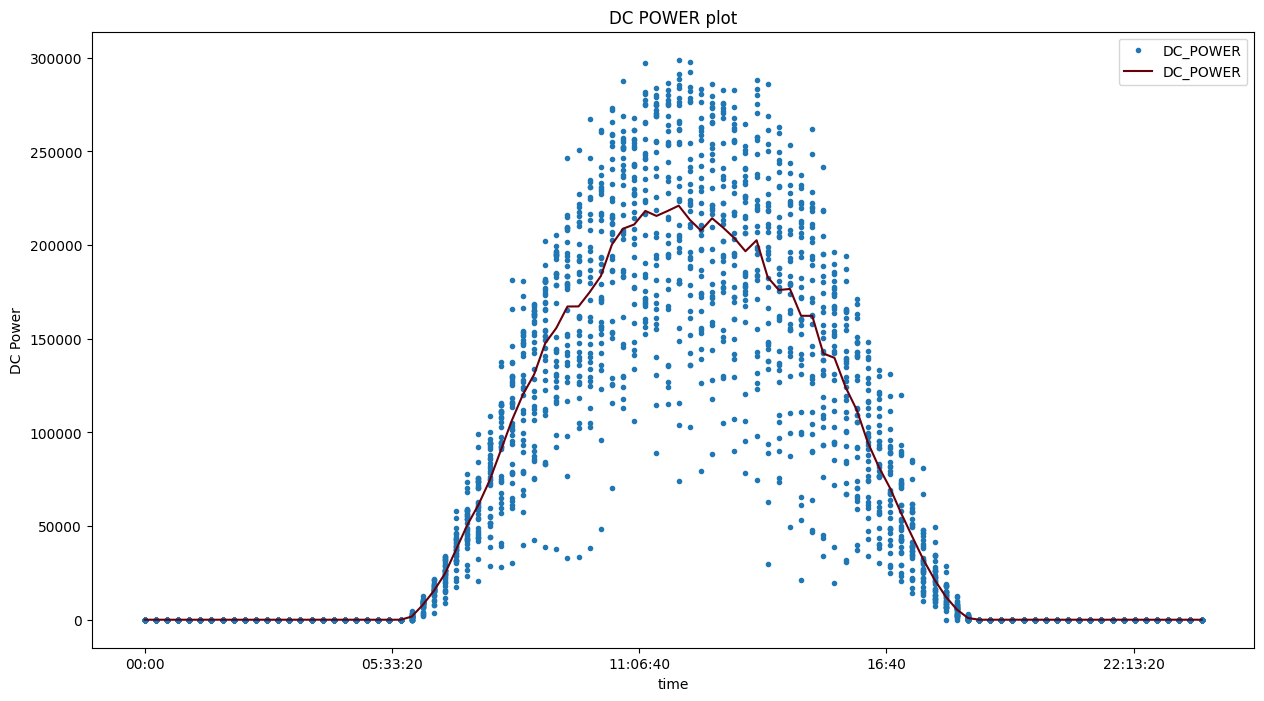

In [30]:
# Plot the 'DC_POWER' column vs the 'time' column of plant1_data
plant1_data.plot(x='time', y='DC_POWER', style='.', figsize=(15, 8))

# Group the data by 'time' and calculate the mean of 'DC_POWER' for each time
plant1_data.groupby('time')['DC_POWER'].agg('mean').plot(legend=True, colormap='Reds_r')

# Adding labels and title
plt.ylabel('DC Power')
plt.title('DC POWER plot')

# Display the plot
plt.show()

## Daily Yield
### Histogram

Text(0.5, 1.0, 'DAILY_YIELD Histogram')

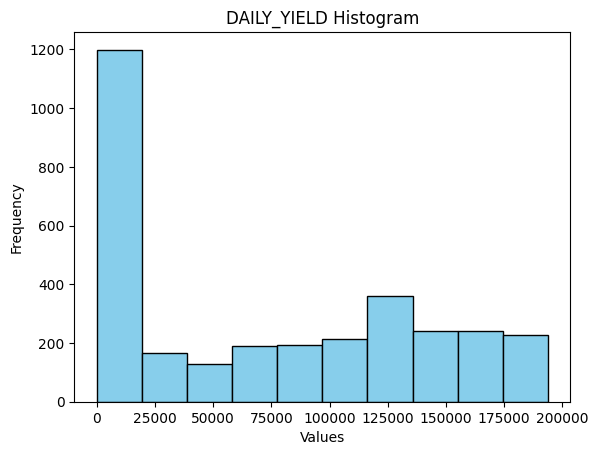

In [31]:
# Plotting the histogram
plt.hist(plant1_data['DAILY_YIELD'], bins=10, color='skyblue', edgecolor='black')

# Adding labels and title
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('DAILY_YIELD Histogram')

### Scatter Plot and Yield Mean

Plot the data points from the 'DAILY_YIELD' column against the 'time' column in the format of a scatter plot and plot the mean of daily yield on a line graph.

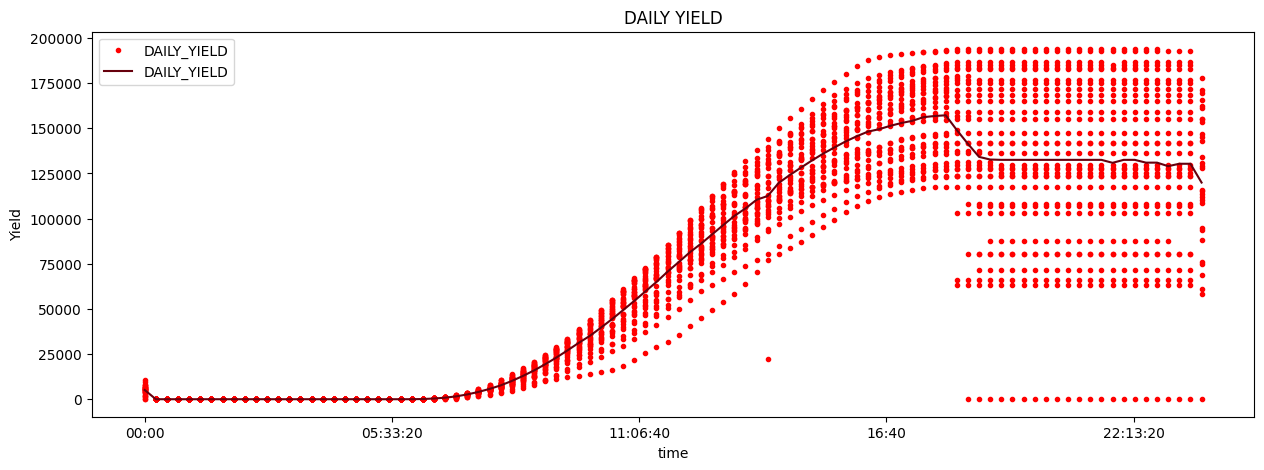

In [32]:
# Plot the 'DAILY_YIELD' column against the 'time' column of plant1_data
plant1_data.plot(x='time', y='DAILY_YIELD', style='r.', figsize=(15, 5))

# Group the data by 'time' and calculate the mean of 'DAILY_YIELD' for each time
plant1_data.groupby('time')['DAILY_YIELD'].agg('mean').plot(legend=True, colormap='Reds_r')

# Set the title, labels and display the plot
plt.title('DAILY YIELD')
plt.ylabel('Yield')
plt.show()

### Daily Yield and AC-DC Power
Transform the original data into a new DataFrame (df_daily_gen), grouping the values for each time interval and adding an additional column ('time') to allow time-based analysis.

Text(0, 0.5, 'kW')

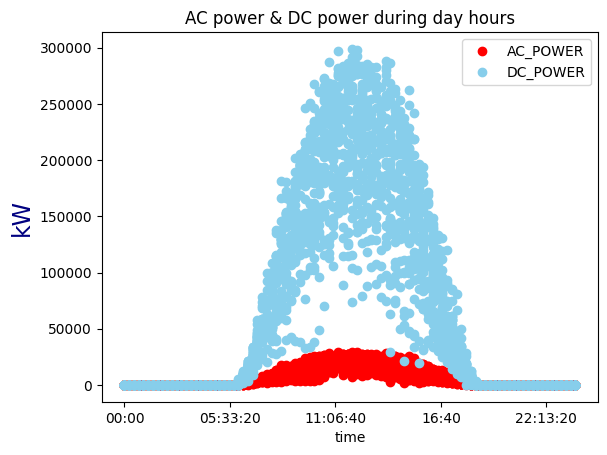

In [33]:
# Group the DataFrame data by the 'DATE_TIME' column and reset the DataFrame index
df_daily_gen = df_gen.groupby('DATE_TIME').sum().reset_index()

# Create a new column 'time' in the DataFrame
df_daily_gen['time'] = df_daily_gen['DATE_TIME'].dt.time

# Remove the 'DATE_TIME' column from the DataFrame and set 'time' as the new index
df_daily_gen.set_index('time', inplace=True)
df_daily_gen.drop(columns=['DATE_TIME'], inplace=True)

# Plot AC_POWER and DC_POWER
ax = df_daily_gen[['AC_POWER', 'DC_POWER']].plot(style='o', color=["r", 'skyblue'])
ax.set_title('AC power & DC power during day hours')
ax.set_ylabel('kW', color='navy', fontsize=17)

## Module Temperature
### Histogram

Text(0.5, 1.0, 'MODULE_TEMPERATURE Histogram')

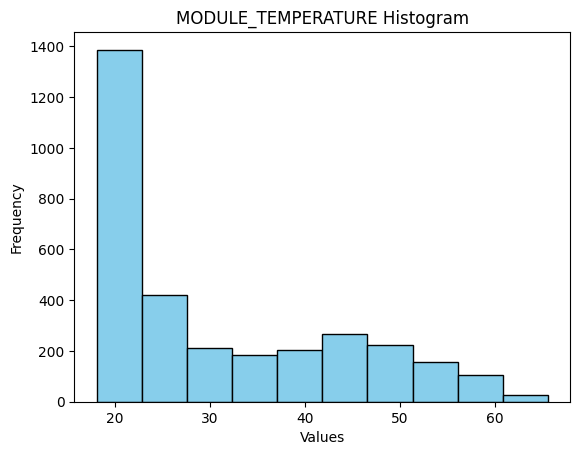

In [34]:
# Plotting the histogram
plt.hist(plant1_sensor['MODULE_TEMPERATURE'], bins=10, color='skyblue', edgecolor='black')

# Adding labels and title
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('MODULE_TEMPERATURE Histogram')

Text(0, 0.5, 'Temperature(°C)')

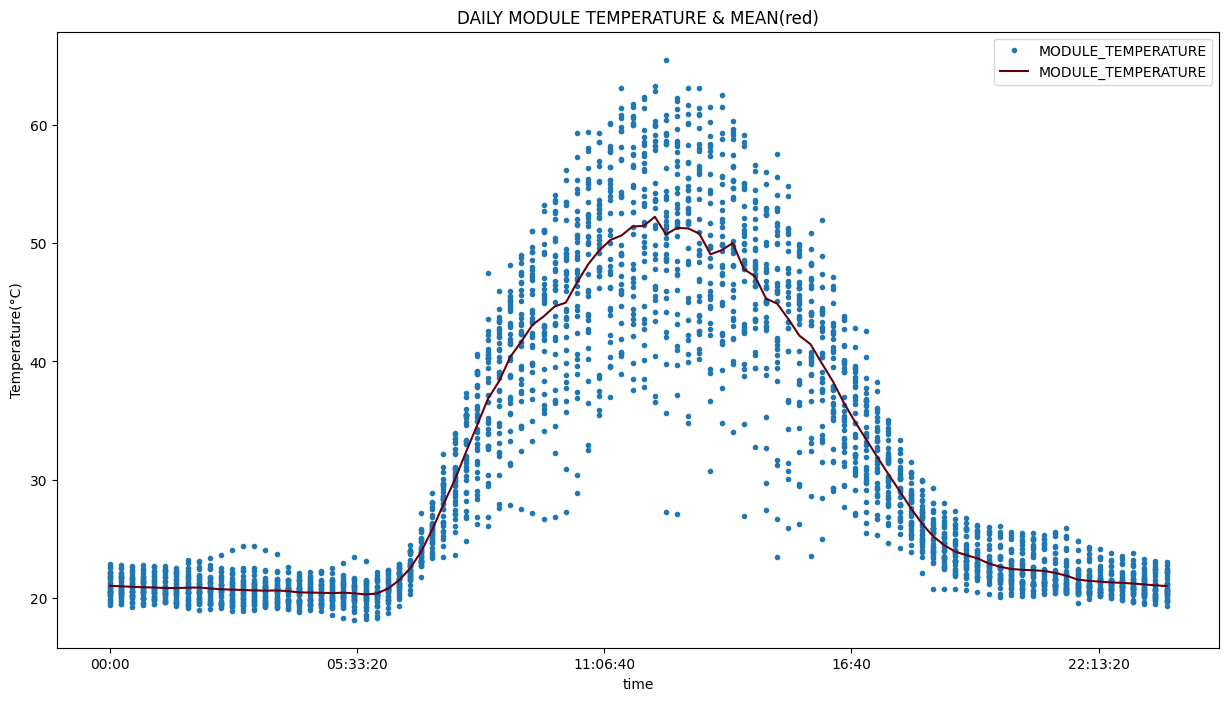

In [35]:
# Plot the 'MODULE_TEMPERATURE' column against the 'time' column of plant1_sensor
plant1_sensor.plot(x='time', y='MODULE_TEMPERATURE', figsize=(15, 8), style='.')

# Group the data by 'time' and calculate the mean of 'MODULE_TEMPERATURE' for each time,
# then plot the mean values as a line plot
plant1_sensor.groupby('time')['MODULE_TEMPERATURE'].agg('mean').plot(colormap='Reds_r', legend=True)

# Set the title and the labels
plt.title('DAILY MODULE TEMPERATURE & MEAN(red)')
plt.ylabel('Temperature(°C)')

### Data Information
power_sensor is the DataFrame containing the merged data of power generation and temperature from the Solar Plant. These data will be used in the machine learning model.

In [36]:
power_sensor

,DATE_TIME,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD
0,2020-05-15 00:00:00,25.184316,22.857507,0.0,0.0,0.0,0.000000,143581676.0
1,2020-05-15 00:15:00,25.084589,22.761668,0.0,0.0,0.0,0.000000,143581676.0
2,2020-05-15 00:30:00,24.935753,22.592306,0.0,0.0,0.0,0.000000,143581676.0
3,2020-05-15 00:45:00,24.846130,22.360852,0.0,0.0,0.0,0.000000,143581676.0
4,2020-05-15 01:00:00,24.621525,22.165423,0.0,0.0,0.0,0.000000,150761642.0
...,...,...,...,...,...,...,...,...
3152,2020-06-17 22:45:00,22.150570,21.480377,0.0,0.0,0.0,129571.000000,156142755.0
3153,2020-06-17 23:00:00,22.129816,21.389024,0.0,0.0,0.0,129571.000000,156142755.0
3154,2020-06-17 23:15:00,22.008275,20.709211,0.0,0.0,0.0,129571.000000,156142755.0
3155,2020-06-17 23:30:00,21.969495,20.734963,0.0,0.0,0.0,129571.000000,156142755.0


In [37]:
power_sensor.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3157 entries, 0 to 3156
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   DATE_TIME            3157 non-null   datetime64[ns]
 1   AMBIENT_TEMPERATURE  3157 non-null   float64       
 2   MODULE_TEMPERATURE   3157 non-null   float64       
 3   IRRADIATION          3157 non-null   float64       
 4   DC_POWER             3157 non-null   float64       
 5   AC_POWER             3157 non-null   float64       
 6   DAILY_YIELD          3157 non-null   float64       
 7   TOTAL_YIELD          3157 non-null   float64       
dtypes: datetime64[ns](1), float64(7)
memory usage: 197.4 KB


### Training and Test Sets
Selecting three columns from the power_sensor DataFrame to be our input features (features) and selecting the 'DC_POWER' column from the power_sensor DataFrame to be our prediction target.

In [40]:
# Splitting the data into features (X) and target (y)
X = power_sensor[['AMBIENT_TEMPERATURE', 'MODULE_TEMPERATURE', 'IRRADIATION']]
y = power_sensor['DC_POWER']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Linear Regression Model
Using temperature and irradiation data, a linear regression model was used to predict energy generation.

Initializing a linear regression model object.
Training the linear regression model using the training datasets.
Using the trained model to make predictions on the test data.

In [41]:
# Initializing and training the linear regression model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Making predictions on the test set
lr_prev = lr_model.predict(X_test)

### Coefficient of Determination \( R^2 \)
Calculates the coefficient of determination \( R^2 \) (R-squared) to evaluate the performance of the linear regression model.
It takes as input the actual values from the test set and the predictions made by the model. The closer to 1, the better the model is at explaining the variability of the data.inear.

In [44]:
# Calculating the R² score
r2 = r2_score(y_test, lr_prev)
print("Coefficient of Determination (R²):", r2)

Coefficient of Determination (R²): 0.9939010484064352


### MSE and MAE
- MSE is a measure of the average squared error between predictions and actual values. The lower the MSE, the better the model is at fitting the data.
- MAE is a measure of the average absolute differences between predictions and actual values. The lower the MAE, the better the model's performance.

In [45]:
# Evaluating the model performance
mse = mean_squared_error(y_test, lr_prev)
mae = mean_absolute_error(y_test, lr_prev)

print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)

Mean Squared Error (MSE): 45216830.68690255
Mean Absolute Error (MAE): 4000.6956272785133


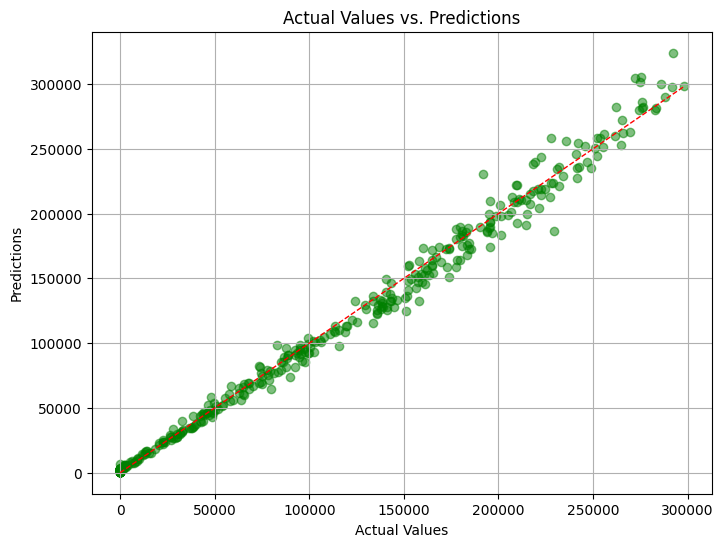

In [46]:
# Plotting actual values against predictions
plt.figure(figsize=(8, 6))
plt.scatter(x=y_test, y=lr_prev, color='green', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', lw=1)
plt.xlabel('Actual Values')
plt.ylabel('Predictions')
plt.title('Actual Values vs. Predictions')
plt.grid(True)
plt.show()